## Calculate moving avegare

In [231]:
import pandas as pd

In [232]:
import matplotlib.pyplot as plt

In [233]:
#import pip

In [234]:
#pip.main(['install','pandas_datareader'] )

In [235]:
from pandas_datareader import data, wb, Options
import datetime

In [236]:
g1=data.DataReader('INFY.NS', 'yahoo','2016-01-01')

In [237]:
d15=g1['Adj Close'].rolling(window=15)

In [238]:
d50=g1['Adj Close'].rolling(window=50)

In [239]:
g1=pd.concat([g1, pd.Series(d15.mean(), name='MA15'),pd.Series(d50.mean(),name='MA50')], axis=1).dropna()

## Calculate exponential moving average

In [240]:
g1.reset_index(inplace=True)

In [241]:
g1['EMA15']=''
g1=g1.set_value(0,'EMA15',g1.at[0,'MA15'])

In [242]:
g1['EMA15'][:3]

0    1114.61
1           
2           
Name: EMA15, dtype: object

In [243]:
sf=2/(15+1)
for index, val in enumerate(g1['EMA15']):
    if val == '':
        ema_val=(g1.at[index, 'Adj Close'] - g1.at[index-1, 'EMA15']) * sf + g1.at[index,'Adj Close']
        g1=g1.set_value(index, 'EMA15', ema_val)

In [244]:
g1[-2:-1]

,Date,Open,High,Low,Close,Volume,Adj Close,MA15,MA50,EMA15
225,2017-01-19,951.0,959.59998,948.09998,958.09998,4438200,958.09998,978.499993,971.071998,959.088


In [245]:
from matplotlib.finance import quotes_historical_yahoo_ohlc, candlestick_ohlc
from matplotlib.dates import date2num, DateFormatter
from datetime import datetime

In [246]:
date_format=DateFormatter('%b %y')

In [247]:
g1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
Date         227 non-null datetime64[ns]
Open         227 non-null float64
High         227 non-null float64
Low          227 non-null float64
Close        227 non-null float64
Volume       227 non-null int64
Adj Close    227 non-null float64
MA15         227 non-null float64
MA50         227 non-null float64
EMA15        227 non-null object
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 16.9+ KB


In [248]:
g1=g1.set_index('Date')

In [249]:
g1['Dates']=date2num(g1.index.to_pydatetime())

In [252]:
g1=g1[-20:-1]
dataAr=[tuple(x) for x in g1[['Dates','Open','High','Low','Adj Close']].to_records(index=False)]

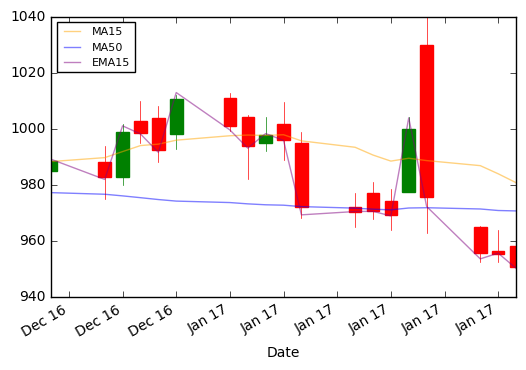

In [253]:
fig,ax=plt.subplots()
ax.xaxis_date()
ax.xaxis.set_major_formatter(date_format)
mlp=candlestick_ohlc(ax, dataAr, width=0.7, colorup='g', colordown='r' )
g1.MA15.plot(style='-', alpha=0.5, color='orange', label='MA15')
g1.MA50.plot(style='-', alpha=0.5, color='blue', label='MA50')
g1.EMA15.plot(style='-', alpha=0.5, color='purple', label='EMA15')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='best', fontsize=8)
plt.show()

## Calculate reinvestment options

In [174]:
share_price=642
moving_avg=630
hold_volume=27
hold_price=104
count=0

def calculate_hold_price(share_price=share_price, hold_volume=hold_volume, 
                     hold_price=hold_price, moving_avg=moving_avg,   extra=0):
    #new_hold_price=((hold_volume + extra) * share_price - hold_price * hold_volume) / hold_volume + extra
    
    new_hold_price=(hold_volume*hold_price+extra*share_price)/(hold_volume+extra)
    return new_hold_price

new_hold_price=0

while new_hold_price < moving_avg*2/3 :
    prev_hold_price=new_hold_price
    new_hold_price=calculate_hold_price(extra=count)
    if new_hold_price >= moving_avg*2/3:
        break
    count +=1
count -= 1 
new_hold_volume=hold_volume+count  
print(share_price, moving_avg, int(prev_hold_price), new_hold_volume, count)
   

642 630 418 65 38
